这个笔记本在为神经网络 DeepONets 来求解位势方程做准备。 
现在的主要任务是检查生成的数据是否正确，并调用包解位势方程。

In [9]:
import numpy as np
from tqdm import tqdm
import fipy as fp
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm  # Import tqdm for progress bar



def solve_poissons_equation(sources, n_points):
    """Solve Poisson's equation for given random functions."""
    num_samples = sources.shape[0]
    solutions = np.zeros((num_samples, n_points, n_points))  # 用于存储每个样本的解

    for i in tqdm(range(num_samples), desc="Solving Poisson's Equation"):
        f = sources[i]  # 从数组中获取第i个随机函数
        
        # Step 2: Create the mesh
        mesh = fp.Grid2D(dx=1/n_points, dy=1/n_points, nx=n_points, ny=n_points)
        
        # Step 3: Define the variable
        phi = fp.CellVariable(name="Potential", mesh=mesh)

        # Create a CellVariable for the source term
        source_term = fp.CellVariable(name="Source Term", mesh=mesh, value=f.flatten())

        # Step 4: Define the equation (Poisson's equation)
        eq = (fp.DiffusionTerm() == source_term)

        # Step 5: Set boundary conditions
        phi.constrain(value=0, where=mesh.facesLeft)   # Set left boundary to 0
        phi.constrain(value=0, where=mesh.facesRight)  # Set right boundary to 0
        phi.constrain(value=0, where=mesh.facesBottom)  # Set bottom boundary to 0
        phi.constrain(value=0, where=mesh.facesTop)     # Set top boundary to 0

        # Step 6: Solve the equation
        eq.solve(var=phi)

        # Store the solution in the solutions array
        solutions[i, :, :] = phi.value.reshape(n_points, n_points)

    return solutions


import os
import numpy as np

n_points = 30

home_dir = os.path.expanduser("~")  # 获取 home 目录
file_path = os.path.join(home_dir, "DLL-data/20240929_source_data.npz")  # 组合 home 目录和文件名
print(file_path)  # 打印文件的完整路径

data = np.load(file_path)
sources = data['sources']
print("Source data loaded from the file.")

# 求解泊松方程
solutions = solve_poissons_equation(sources, n_points)

# 保存源函数和解到文件
output_file = os.path.join(home_dir, "DLL-data/20240929_solution_data.npz")
np.savez(output_file, solutions=solutions)
print("Data saved to '20240929_solution_data.npz'.")

/people/weiz828/DLL-data/20240929_source_data.npz
Source data loaded from the file.


Solving Poisson's Equation:   0%|          | 0/1000 [00:00<?, ?it/s]

Data saved to '20240929_solution_data.npz'.


In [10]:
import os
import numpy as np

home_dir = os.path.expanduser("~")  # 获取 home 目录
source_path = os.path.join(home_dir, "DLL-data/20240929_source_data.npz")  # 组合 home 目录和文件名
print(source_path)  # 打印文件的完整路径

data = np.load(source_path)
sources = data['sources']
print("Source data loaded from the file.")

home_dir = os.path.expanduser("~")  # 获取 home 目录
solution_path = os.path.join(home_dir, "DLL-data/20240929_solution_data.npz")  # 组合 home 目录和文件名
print(solution_path)  # 打印文件的完整路径

data = np.load(solution_path)
solutions = data['solutions']
print("Solution data loaded from the file.")

/people/weiz828/DLL-data/20240929_source_data.npz
Source data loaded from the file.
/people/weiz828/DLL-data/20240929_solution_data.npz
Solution data loaded from the file.


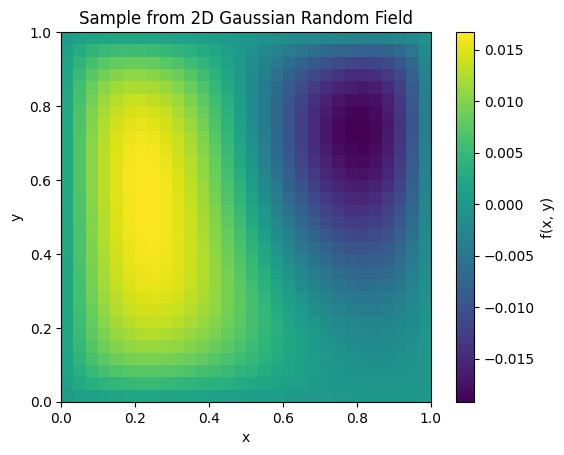

In [12]:
# Plot the random 2D function from the loaded file
import matplotlib.pyplot as plt

plt.imshow(solutions[20], extent=(0, 1, 0, 1), origin='lower', cmap='viridis')
plt.colorbar(label='f(x, y)')
plt.title('Sample from 2D Gaussian Random Field')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

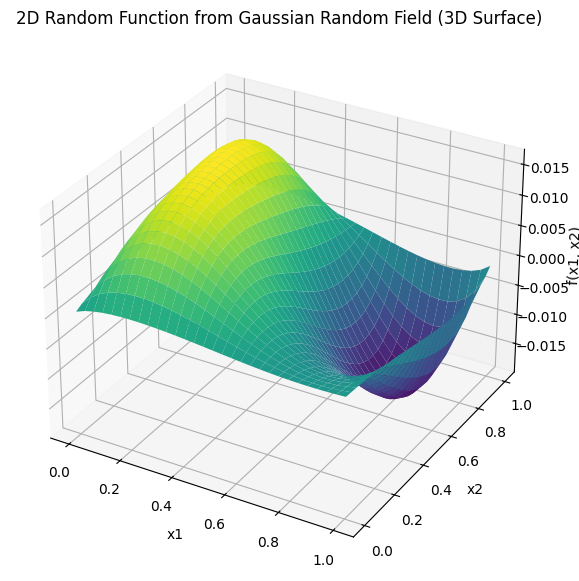

In [13]:
from mpl_toolkits.mplot3d import Axes3D

n_points = 30  # Number of points along each dimension
x1 = np.linspace(0, 1, n_points)
x2 = np.linspace(0, 1, n_points)
X1, X2 = np.meshgrid(x1, x2)  # Create a 2D grid
X_grid = np.column_stack([X1.ravel(), X2.ravel()])  # Flatten to (n_points^2, 2) shape

# Step 6: 3D Surface plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X1, X2, solutions[20], cmap='viridis', edgecolor='none')

ax.set_title("2D Random Function from Gaussian Random Field (3D Surface)")
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')

plt.show()

In [14]:
solutions[40]==solutions[20]

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False,